In [1]:
from afinn import Afinn
import pandas as pd

# Load the AFINN lexicon
afinn = Afinn()
# Read the text file into a DataFrame
file_path = "C:/Users/91830/Documents/cleaned_documet.txt"
data = pd.read_csv(file_path, delimiter='\t', header=None, names=['text'])

# Extract 5% of the document
num_samples = int(len(data) * 0.05)
data_subset = data.sample(n=num_samples, random_state=42)

# Get sentiments for AFINN words
afinn_words = list(afinn._dict.keys())
sentiment_scores = [afinn.score(word) for word in afinn_words]

# Create a DataFrame to store the words and their sentiment scores
df = pd.DataFrame({'word': afinn_words, 'value': sentiment_scores})

# Sample 15 rows from the DataFrame
sampled_df = df.sample(n=15)

# Sort the sampled DataFrame by descending sentiment scores
sampled_df_sorted = sampled_df.sort_values(by='value', ascending=False)

# Print the sampled DataFrame
print(sampled_df_sorted)


              word  value
3142     unequaled    2.0
597     consolable    2.0
616        contend   -1.0
687        crushes   -1.0
2231    oppression   -2.0
345        blaming   -2.0
674      criticism   -2.0
982   dissatisfied   -2.0
1645       ignored   -2.0
2940        suffer   -2.0
2617           rob   -2.0
1001    disturbing   -2.0
734      deceitful   -3.0
3252     violently   -3.0
1933         liars   -3.0


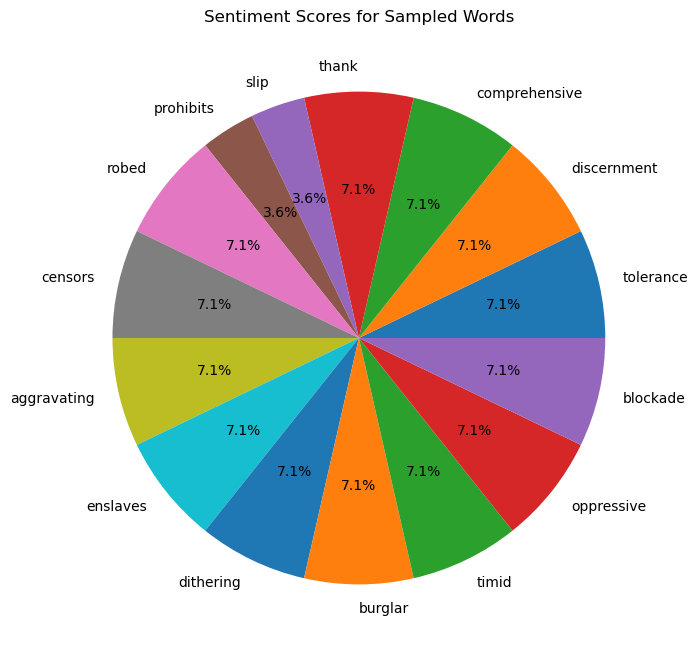

In [2]:
import matplotlib.pyplot as plt
from afinn import Afinn
import random

# Load the AFINN lexicon
afinn = Afinn()
# Read the text file into a DataFrame
file_path = "C:/Users/91830/Documents/cleaned_documet.txt"
data = pd.read_csv(file_path, delimiter='\t', header=None, names=['text'])

# Extract 5% of the document
num_samples = int(len(data) * 0.05)
data_subset = data.sample(n=num_samples, random_state=42)

# Get sentiments for AFINN words
afinn_words = list(afinn._dict.keys())
sentiment_scores = [afinn.score(word) for word in afinn_words]

# Sample 15 words
random.seed(42)  # Setting a seed for reproducibility
sampled_words = random.sample(afinn_words, 15)

# Calculate sentiment scores for sampled words
word_sentiments = {}
for word in sampled_words:
    sentiment_score = afinn.score(word)
    word_sentiments[word] = sentiment_score

# Sort words based on sentiment scores
sorted_words = sorted(word_sentiments.items(), key=lambda x: x[1], reverse=True)

# Create lists for plotting
words = [word[0] for word in sorted_words]
sentiment_scores = [abs(word[1]) for word in sorted_words]

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_scores, labels=words, autopct='%1.1f%%')
plt.title('Sentiment Scores for Sampled Words')
plt.show()
